In [1]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    X_train = train_dataset
    X_test = test_dataset

    X_train_resnet50 = preprocess_resnet50(X_train)
    X_test_resnet50 = preprocess_resnet50(X_test)

    X_train_vgg16 = preprocess_vgg16(X_train)
    X_test_vgg16 = preprocess_vgg16(X_test)

    X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
    X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.6U3ATE_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.6U3ATE_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.6U3ATE_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
Error loading dataset: name 'preprocess_resnet50' is not defined


In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x) # output layer

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=validation_dataset_resnet50)



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=validation_dataset_vgg16)



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=validation_dataset_mobilenetv2)

178
22
157
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.9856 - loss: 0.0632 - val_accuracy: 0.3873 - val_loss: 11.0586
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.9748 - loss: 0.0988 - val_accuracy: 0.4510 - val_loss: 6.6080
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.9827 - loss: 0.0804 - val_accuracy: 0.2333 - val_loss: 14.0070
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 362ms/step - accuracy: 0.9681 - loss: 0.0934 - val_accuracy: 0.6863 - val_loss: 1.5694
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.9802 - loss: 0.0651 - val_accuracy: 0.6471 - val_loss: 1.8230
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.9731 - loss: 0.0871 - val_accuracy: 0.6275 - val_loss: 2.0511
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9890 - loss: 0.0306 - val_accuracy: 0.1000 - val_loss: 10.7034
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.9971 - loss: 0.0190 - val_acc

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

# Define image size
IMG_SIZE = (224, 224)

# Function to preprocess images and labels
def preprocess_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    # Apply model-specific preprocessing later, as it's model dependent
    return image, label

def preprocess_data(dataset, preprocess_fn):
    dataset = dataset.map(preprocess_image)
    dataset = dataset.map(lambda image, label: (preprocess_fn(image), tf.one_hot(label, depth=info.features['label'].num_classes)))
    dataset = dataset.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Apply preprocessing for each model
train_dataset_resnet50 = preprocess_data(train_dataset, preprocess_resnet50)
validation_dataset_resnet50 = preprocess_data(validation_dataset, preprocess_resnet50)
test_dataset_resnet50 = preprocess_data(test_dataset, preprocess_resnet50)

train_dataset_vgg16 = preprocess_data(train_dataset, preprocess_vgg16)
validation_dataset_vgg16 = preprocess_data(validation_dataset, preprocess_vgg16)
test_dataset_vgg16 = preprocess_data(test_dataset, preprocess_vgg16)

train_dataset_mobilenetv2 = preprocess_data(train_dataset, preprocess_mobilenetv2)
validation_dataset_mobilenetv2 = preprocess_data(validation_dataset, preprocess_mobilenetv2)
test_dataset_mobilenetv2 = preprocess_data(test_dataset, preprocess_mobilenetv2)

## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x) # output layer

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 2.2 Using VGG16

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 2.3 Using MobileNetV2

In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [27]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=validation_dataset_resnet50)



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=validation_dataset_vgg16)



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=validation_dataset_mobilenetv2)

178
22
157
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 717ms/step - accuracy: 0.2190 - loss: 4.0678 - val_accuracy: 0.1235 - val_loss: 40.9054
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.8656 - loss: 0.5922 - val_accuracy: 0.2490 - val_loss: 18.7072
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.9618 - loss: 0.1537 - val_accuracy: 0.3539 - val_loss: 8.9171
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 876ms/step - accuracy: 0.0401 - loss: 8.7532 - val_accuracy: 0.2578 - val_loss: 3.4265
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.4136 - loss: 2.5144 - val_accuracy: 0.4588 - val_loss: 2.4264
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 354ms/step - accuracy: 0.7062 - loss: 1.1133 - val_accuracy: 0.5108 - val_loss: 2.2003
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 868ms/step - accuracy: 0.1426 - loss: 4.2080 - val_accuracy: 0.0902 - val_loss: 5.5980
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.8371 - loss: 0.7419 - val_ac

In [28]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=validation_dataset_resnet50)



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=validation_dataset_vgg16)



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=validation_dataset_mobilenetv2)

178
22
157
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.9761 - loss: 0.1028 - val_accuracy: 0.3471 - val_loss: 11.1532
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.9899 - loss: 0.0514 - val_accuracy: 0.4118 - val_loss: 9.5996
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.9852 - loss: 0.0577 - val_accuracy: 0.4941 - val_loss: 6.5525
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 361ms/step - accuracy: 0.8287 - loss: 0.6270 - val_accuracy: 0.5206 - val_loss: 2.5605
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.8640 - loss: 0.4866 - val_accuracy: 0.5912 - val_loss: 1.8031
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 0.9304 - loss: 0.2482 - val_accuracy: 0.6284 - val_loss: 1.7447
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9859 - loss: 0.0591 - val_accuracy: 0.0833 - val_loss: 11.7084
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9847 - loss: 0.0934 - val_accu

## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [30]:
acc_resnet50    = model_resnet50.evaluate(test_dataset_resnet50)[1]
acc_vgg16       = model_vgg16.evaluate(test_dataset_vgg16)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.4853 - loss: 6.2998
193/193 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.5934 - loss: 2.0429
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.0530 - loss: 12.7081
ResNet50 Accuracy: 0.48
VGG16 Accuracy: 0.60
MobileNetV2 Accuracy: 0.05


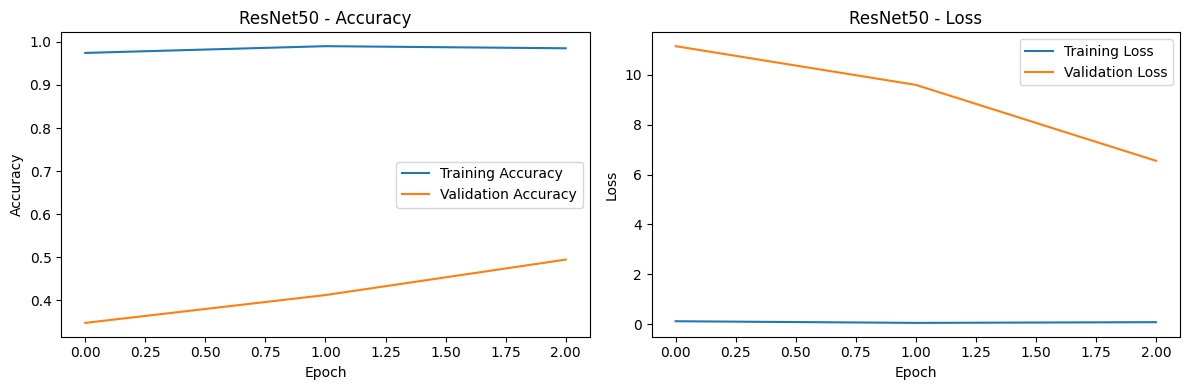

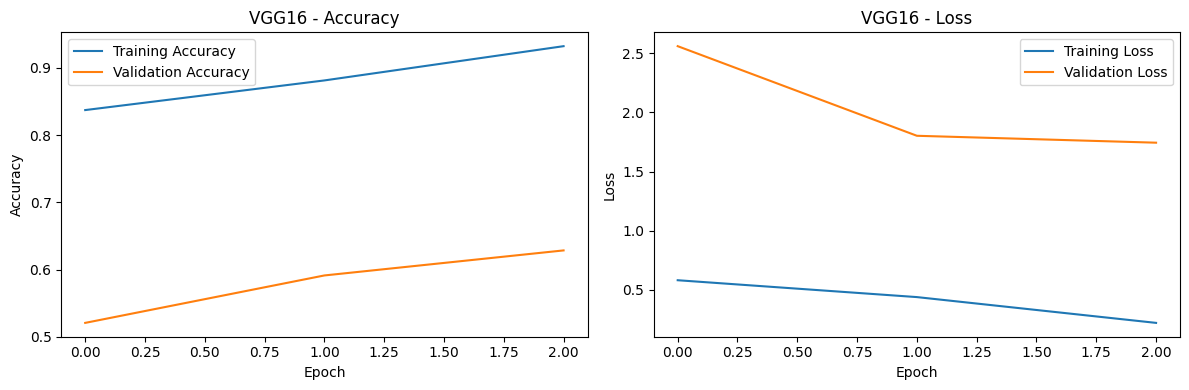

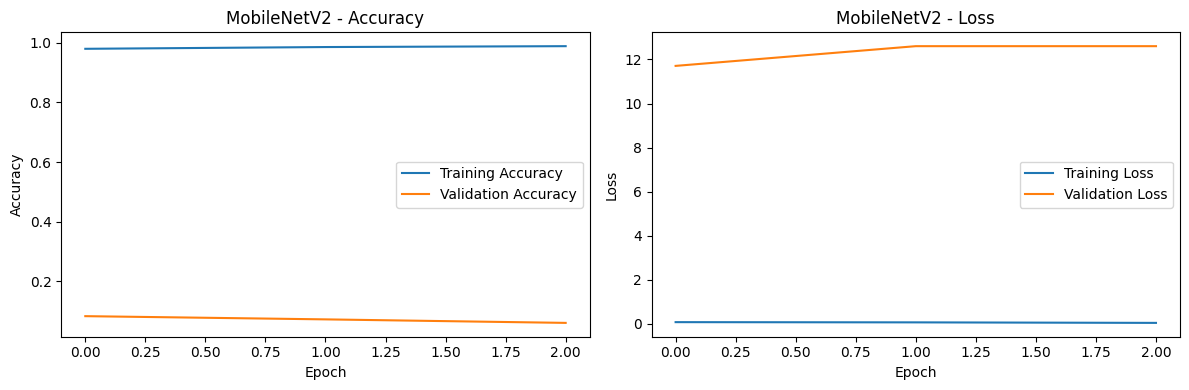

In [31]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

In [32]:
# Save the models
model_resnet50.save('resnet50_cifar100.h5')
model_vgg16.save('vgg16_cifar100.h5')
model_mobilenetv2.save('mobilenetv2_cifar100.h5')

### **Analysis of Model Performance and Future Perspectives**
Based on the training history plots and the test accuracies:

**ResNet50:**

Outcomes: The training accuracy for ResNet50 is very high (close to 1.0), but the validation accuracy is significantly lower and fluctuates, indicating substantial overfitting. The test accuracy of around 48% confirms that the model is not generalizing well to unseen data. The validation loss also increases significantly after a few epochs, which is another strong indicator of overfitting.

**VGG16:**

Outcomes: VGG16 shows a better alignment between training and validation accuracy compared to ResNet50 and MobileNetV2, although there is still some overfitting as the validation accuracy plateaus while training accuracy continues to rise. The validation loss also shows a less drastic increase than ResNet50. The test accuracy of around 60% is the highest among the three models, suggesting better generalization.

**MobileNetV2:**

Outcomes: MobileNetV2 exhibits severe overfitting, similar to ResNet50. The training accuracy quickly reaches close to 1.0, while the validation accuracy remains very low and erratic. The test accuracy of around 5% is very poor, indicating that the model has essentially failed to learn to generalize. The validation loss is also very high and unstable.

**Future Perspectives:**

**Data Augmentation:** Implement robust data augmentation pipelines for all models to expose them to more varied examples during training.

**Regularization:** Systematically experiment with different regularization techniques and their hyperparameters.

**Fine-tuning Strategy:** Explore different strategies for unfreezing layers in the pre-trained models. Instead of unfreezing a fixed number of layers, consider using techniques like gradual unfreezing.

**Hyperparameter Tuning:** Tune hyperparameters such as learning rate, batch size, and optimizer settings for each model.

**Cross-validation:** Use cross-validation to get a more reliable estimate of the models' performance and ensure the results are not specific to the current data split.
